#**pta-000**

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate



**pandas**: A data management library that facilitates working with data in the form of tables (DataFrames), and is used for reading, writing, and filtering.

**NumPy**: A library for manipulating numbers and matrices, providing fast and efficient mathematical operations.

**SciKit-learn.preprocessing**: Tools for data preparation, such as data standardization and categorical value transformation.

**SciKit-learn.ensemble**: Models that combine several smaller models to improve performance, such as Random Forest.

**Matplotlib.pyplot**: A library for creating graphs and visually displaying data.

**Seaborn**: A library built on Matplotlib that facilitates more visually appealing statistical visualizations.

**r2_score**:
Measures how much of the target variance your model explains.

**mean_absolute_error**:
Computes the average absolute difference between predictions and true values.

**mean_squared_error**:
Computes the average of squared differences between predictions and true values.

**PolynomialFeatures**:
Transforms input features into polynomial combinations.

**Pipeline**:
Chains preprocessing steps and a model into one workflow.

**LinearRegression**:
Fits a linear model to predict a continuous target.

**tabulate**:
It formats data into nicely structured tables for display in the console.


**Including House Prices dataset**  
[House_Prices.csv](https://drive.google.com/drive/folders/1h5rSf0Ei2N7HhCLZqk0cDOJ6JioXIEqO)


# **read the csv file and replacing missing value with (NaN)**

**to make it easier to count the missing value and choose a way to deal with it**

In [ ]:

df = pd.read_csv('/content/House_Prices.csv', delimiter=',', on_bad_lines='warn')
print(df.head())


           ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.1159

**rewrite the data in column and row so it is easier to deal with**

In [ ]:
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+------------------+
|   |       ADDRESS       |    SUBURB    | PRICE  | BEDROOMS | BATHROOMS | GARAGE | LAND_AREA | FLOOR_AREA | BUILD_YEAR | CBD_DIST |       NEAREST_STN        | NEAREST_STN_DIST | DATE_SOLD | POSTCODE |   LATITUDE   |  LONGITUDE  |         NEAREST_SCH          |  NEAREST_SCH_DIST  | NEAREST_SCH_RANK |
+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+------------------+
| 0 |    1 Acorn Place    |  South Lake  | 565000 |    4     |     2     |  2.0   |    600    

# **DATA CLEANING**

# **1.Handle Missing Values [NAN/NULL]**

**counting the number of the missing value (NaN) so we can decide how to deal with it**

In [ ]:

missing_values_count = df.isnull().sum()


missing_values_list = [(column, count) for column, count in missing_values_count.items()]

print(tabulate(missing_values_list, headers=['Column', 'Missing Values'], tablefmt='pretty'))


+------------------+----------------+
|      Column      | Missing Values |
+------------------+----------------+
|     ADDRESS      |       0        |
|      SUBURB      |       0        |
|      PRICE       |       0        |
|     BEDROOMS     |       0        |
|    BATHROOMS     |       0        |
|      GARAGE      |      2478      |
|    LAND_AREA     |       0        |
|    FLOOR_AREA    |       0        |
|    BUILD_YEAR    |      3155      |
|     CBD_DIST     |       0        |
|   NEAREST_STN    |       0        |
| NEAREST_STN_DIST |       0        |
|    DATE_SOLD     |       0        |
|     POSTCODE     |       0        |
|     LATITUDE     |       0        |
|    LONGITUDE     |       0        |
|   NEAREST_SCH    |       0        |
| NEAREST_SCH_DIST |       0        |
| NEAREST_SCH_RANK |     10952      |
+------------------+----------------+


**the number of missing value is huge so we will repace it with the mean of it's column value for the numerical columns**

In [ ]:

numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+-------------------+
|   |       ADDRESS       |    SUBURB    | PRICE  | BEDROOMS | BATHROOMS | GARAGE | LAND_AREA | FLOOR_AREA | BUILD_YEAR | CBD_DIST |       NEAREST_STN        | NEAREST_STN_DIST | DATE_SOLD | POSTCODE |   LATITUDE   |  LONGITUDE  |         NEAREST_SCH          |  NEAREST_SCH_DIST  | NEAREST_SCH_RANK  |
+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+-------------------+
| 0 |    1 Acorn Place    |  South Lake  | 565000 |    4     |     2     |  2.0   |    600 

/tmp/ipython-input-1186912076.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


**rechecking the number of missing value**

In [ ]:
missing_values_after = df.isnull().sum()
missing_values_list_after = [(column, count) for column, count in missing_values_after.items()]
print(tabulate(missing_values_list_after, headers=['Column', 'Missing Values'], tablefmt='pretty'))


+------------------+----------------+
|      Column      | Missing Values |
+------------------+----------------+
|     ADDRESS      |       0        |
|      SUBURB      |       0        |
|      PRICE       |       0        |
|     BEDROOMS     |       0        |
|    BATHROOMS     |       0        |
|      GARAGE      |       0        |
|    LAND_AREA     |       0        |
|    FLOOR_AREA    |       0        |
|    BUILD_YEAR    |       0        |
|     CBD_DIST     |       0        |
|   NEAREST_STN    |       0        |
| NEAREST_STN_DIST |       0        |
|    DATE_SOLD     |       0        |
|     POSTCODE     |       0        |
|     LATITUDE     |       0        |
|    LONGITUDE     |       0        |
|   NEAREST_SCH    |       0        |
| NEAREST_SCH_DIST |       0        |
| NEAREST_SCH_RANK |       0        |
+------------------+----------------+


**now there is no missing value in the data**

#**2.Handle Duplicates**

**number of rows before removing duplicates**

In [ ]:
number_of_rows_before_removing_duplicates = df.shape[0]
number_of_columns_before_removing_duplicates= df.shape[1]

print(f'Number of rows: {number_of_rows_before_removing_duplicates}')
print(f'Number of columns: {number_of_columns_before_removing_duplicates}')



Number of rows: 33656
Number of columns: 19


**remove duplicates by (drop_duplicates) library**

In [ ]:
df_cleaned = df.drop_duplicates()

print(tabulate(df_cleaned.head(10), headers='keys', tablefmt='pretty'))


+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+-------------------+
|   |       ADDRESS       |    SUBURB    | PRICE  | BEDROOMS | BATHROOMS | GARAGE | LAND_AREA | FLOOR_AREA | BUILD_YEAR | CBD_DIST |       NEAREST_STN        | NEAREST_STN_DIST | DATE_SOLD | POSTCODE |   LATITUDE   |  LONGITUDE  |         NEAREST_SCH          |  NEAREST_SCH_DIST  | NEAREST_SCH_RANK  |
+---+---------------------+--------------+--------+----------+-----------+--------+-----------+------------+------------+----------+--------------------------+------------------+-----------+----------+--------------+-------------+------------------------------+--------------------+-------------------+
| 0 |    1 Acorn Place    |  South Lake  | 565000 |    4     |     2     |  2.0   |    600 

**number of rows after removing duplicates**

In [ ]:
number_of_rows_after_removing_duplicates = df.shape[0]
number_of_columns_after_removing_duplicates = df.shape[1]

print(f'Number of rows: {number_of_rows_after_removing_duplicates}')
print(f'Number of columns: {number_of_columns_after_removing_duplicates}')



Number of rows: 33656
Number of columns: 19


In [ ]:
number_of_removed_rows = number_of_rows_before_removing_duplicates - number_of_rows_after_removing_duplicates
print(f'Number of removed rows: {number_of_removed_rows}')

Number of removed rows: 0


# **Train a linear regression model on the DataSet predicting the prices**

**Isolate the price column as it's the output I want for the model**

In [ ]:
prices=df_cleaned['PRICE']
df_cleaned_edited=df_cleaned.drop(columns=['PRICE'])

df_cleaned_edited

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,4,2,2.0,600,160,2003.000000,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,72.672569
1,1 Addis Way,Wandi,3,2,2.0,351,139,2013.000000,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.000000
2,1 Ainsley Court,Camillo,3,1,1.0,719,86,1979.000000,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.000000
3,1 Albert Street,Bellevue,2,1,2.0,651,59,1953.000000,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,72.672569
4,1 Aman Place,Lockridge,4,1,2.0,466,131,1998.000000,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,72.672569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,4,3,2.0,292,245,2013.000000,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.000000
33652,9C Pycombe Way,Westminster,3,2,2.0,228,114,1989.706436,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.000000
33653,9D Pycombe Way,Westminster,3,2,2.0,261,112,1989.706436,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.000000
33654,9D Shalford Way,Girrawheen,3,1,2.0,457,85,1974.000000,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,72.672569


In [ ]:
print(prices)

0         565000
1         365000
2         287000
3         255000
4         325000
          ...   
33651    1040000
33652     410000
33653     427000
33654     295000
33655     295000
Name: PRICE, Length: 33656, dtype: int64


**Isolate the numeric features columns as it's the standard the model will predict the price on**

In [ ]:
df_cleaned.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,72.672569
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.000000
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.000000
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,72.672569
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,72.672569


In [ ]:
features=df_cleaned[['BEDROOMS','BATHROOMS','GARAGE','LAND_AREA','FLOOR_AREA','BUILD_YEAR','CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','NEAREST_SCH_RANK','POSTCODE','LATITUDE','LONGITUDE']]
df_cleaned_edited = df_cleaned_edited.drop(
    columns=['BEDROOMS','BATHROOMS','GARAGE','LAND_AREA','FLOOR_AREA','BUILD_YEAR','CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','NEAREST_SCH_RANK','POSTCODE','LATITUDE','LONGITUDE'],
    errors='ignore'
)
df_cleaned_edited

,ADDRESS,SUBURB,NEAREST_STN,DATE_SOLD,NEAREST_SCH
0,1 Acorn Place,South Lake,Cockburn Central Station,09-2018\r,LAKELAND SENIOR HIGH SCHOOL
1,1 Addis Way,Wandi,Kwinana Station,02-2019\r,ATWELL COLLEGE
2,1 Ainsley Court,Camillo,Challis Station,06-2015\r,KELMSCOTT SENIOR HIGH SCHOOL
3,1 Albert Street,Bellevue,Midland Station,07-2018\r,SWAN VIEW SENIOR HIGH SCHOOL
4,1 Aman Place,Lockridge,Bassendean Station,11-2016\r,KIARA COLLEGE
...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,Fremantle Station,03-2016\r,CHRISTIAN BROTHERS' COLLEGE
33652,9C Pycombe Way,Westminster,Stirling Station,02-2017\r,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL
33653,9D Pycombe Way,Westminster,Stirling Station,02-2017\r,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL
33654,9D Shalford Way,Girrawheen,Warwick Station,10-2016\r,GIRRAWHEEN SENIOR HIGH SCHOOL


In [ ]:
print(tabulate(features.head(20), headers='keys', tablefmt='pretty'))


+----+----------+-----------+--------+-----------+------------+------------+----------+------------------+--------------------+-------------------+----------+--------------+-------------+
|    | BEDROOMS | BATHROOMS | GARAGE | LAND_AREA | FLOOR_AREA | BUILD_YEAR | CBD_DIST | NEAREST_STN_DIST |  NEAREST_SCH_DIST  | NEAREST_SCH_RANK  | POSTCODE |   LATITUDE   |  LONGITUDE  |
+----+----------+-----------+--------+-----------+------------+------------+----------+------------------+--------------------+-------------------+----------+--------------+-------------+
| 0  |   4.0    |    2.0    |  2.0   |   600.0   |   160.0    |   2003.0   | 18300.0  |      1800.0      | 0.8283385518162787 | 72.67256871035941 |  6164.0  |   -32.1159   |  115.84245  |
| 1  |   3.0    |    2.0    |  2.0   |   351.0   |   139.0    |   2013.0   | 26900.0  |      4900.0      | 5.524324354371822  |       129.0       |  6167.0  | -32.19347028 | 115.8595535 |
| 2  |   3.0    |    1.0    |  1.0   |   719.0   |    86.0  

**grph to show the relation between some features and the price**

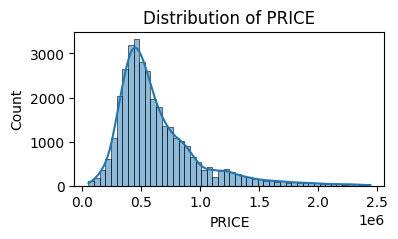

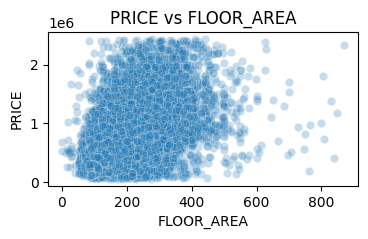

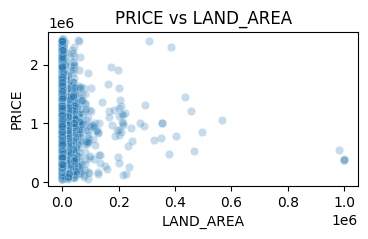

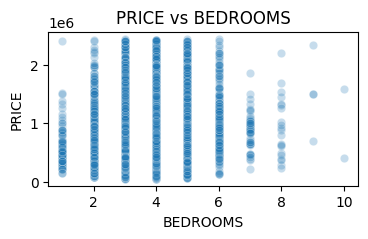

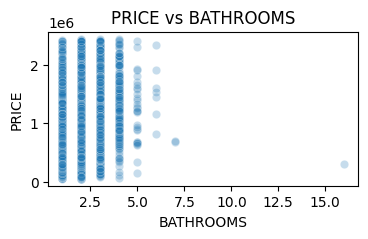

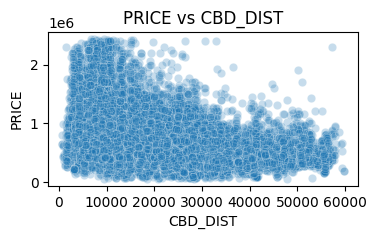

In [414]:
plt.figure(figsize=(4,2))
sns.histplot(df["PRICE"], bins=50, kde=True)
plt.title("Distribution of PRICE")
plt.show()

for col in ["FLOOR_AREA","LAND_AREA","BEDROOMS","BATHROOMS","YEAR_BUILT","CBD_DIST","NEIGHBORHOOD"]:
    if col in df.columns:
        plt.figure(figsize=(4,2))
        sns.scatterplot(data=df, x=col, y="PRICE", alpha=0.25)
        plt.title(f"PRICE vs {col}")
        plt.show()


**Split the data into training and testing sets**

In [ ]:
features_train, features_test, prices_train, prices_test = train_test_split(features  , prices , test_size = 0.2, random_state=1)

In [ ]:
print(features_train, features_test, prices_train, prices_test)

       BEDROOMS  BATHROOMS    GARAGE  LAND_AREA  FLOOR_AREA   BUILD_YEAR  \
10264         4          2  2.000000        566         312  2014.000000   
16157         4          2  2.000000        450         305  2006.000000   
25551         3          1  1.000000        792         139  1985.000000   
11035         5          2  2.000000        583         249  2004.000000   
29907         4          2  2.000000        618         340  2008.000000   
...         ...        ...       ...        ...         ...          ...   
7813          3          1  2.199917        507          82  1964.000000   
32511         4          2  2.000000        684         149  1987.000000   
5192          4          2  2.000000        520         129  1989.706436   
12172         3          2  2.000000        364         134  2001.000000   
33003         4          2  2.000000        622         233  1999.000000   

       CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST  NEAREST_SCH_RANK  \
10264      770

In [ ]:
print(features.shape,features_test.shape,features_train.shape)

(33656, 13) (6732, 13) (26924, 13)


**training model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, prices_train)

LinearRegression()

#**To measure the accuracy**

**R2**

when it's close to 1 it is better
*********
**MAE**

Average true price error .The lower, the better
*********

**MSE**

Major mistakes are punished. The fewer, the better.

In [ ]:
model.fit(features_train, prices_train)
train_pred = model.predict(features_train)

r2 = r2_score(prices_train, train_pred)
mae = mean_absolute_error(prices_train, train_pred)
mse = mean_squared_error(prices_train, train_pred)

print("R2:", r2)
print("MAE:", mae)
print("MSE:", mse)


R2: 0.5962685771356416
MAE: 153613.87307130717
MSE: 50748614265.70693


**for the improving of the performance by using pipeline and encoding non-numerical features**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df_features = df_cleaned[
    ['BEDROOMS','BATHROOMS','GARAGE','LAND_AREA','FLOOR_AREA',
     'BUILD_YEAR','CBD_DIST','NEAREST_STN_DIST',
     'NEAREST_SCH_DIST','NEAREST_SCH_RANK',
     'POSTCODE','LATITUDE','LONGITUDE',
     'SUBURB','NEAREST_STN']
]

prices = df_cleaned['PRICE']


categorical_features = ['SUBURB', 'NEAREST_STN']
numerical_features = [
    'BEDROOMS','BATHROOMS','GARAGE','LAND_AREA','FLOOR_AREA',
    'BUILD_YEAR','CBD_DIST','NEAREST_STN_DIST',
    'NEAREST_SCH_DIST','NEAREST_SCH_RANK',
    'POSTCODE','LATITUDE','LONGITUDE'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

features_train, features_test, prices_train, prices_test = train_test_split(
    df_features, prices, test_size=0.2, random_state=1
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ("model", LinearRegression())
])

pipe.fit(features_train, prices_train)


pred_test = pipe.predict(features_test)

r2 = r2_score(prices_test, pred_test)
mae = mean_absolute_error(prices_test, pred_test)
rmse = np.sqrt(mean_squared_error(prices_test, pred_test))

print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.7634895319108782
MAE: 108885.3048819469
RMSE: 175431.19576001758


**trying the model after improving accuracy and testing it**

In [ ]:

price_pred = pipe.predict(features_test)

results = pd.DataFrame({'Actual': prices_test, 'Predicted': price_pred ,'diffrence': price_pred-prices_test })
print(results.head())
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


       Actual      Predicted      diffrence
11383  420000  437622.213368   17622.213368
30417  985000  804531.647803 -180468.352197
30397  565000  632162.773761   67162.773761
32383  550000  448203.645732 -101796.354268
4537   550000  408299.112908 -141700.887092
R2: 0.7634895319108782
MAE: 108885.3048819469
RMSE: 175431.19576001758
